In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("processed_kelulusan.csv")
X = df.drop("Lulus", axis=1)
y = df["Lulus"]

sc = StandardScaler()
Xs = sc.fit_transform(X)

X_train, X_temp, y_train, y_temp = train_test_split(
    Xs, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42)

print(X_train.shape, X_val.shape, X_test.shape)

(7, 5) (1, 5) (2, 5)


In [ ]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(32, activation="relu"),
    layers.Dropout(0.3),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")  # klasifikasi biner
])

model.compile(optimizer=keras.optimizers.Adam(1e-3),
              loss="binary_crossentropy",
              metrics=["accuracy","AUC"])
model.summary()

  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.9.23-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.11.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
   ------------------------

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 737 (2.88 KB)

 Trainable params: 737 (2.88 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:

# ===============================================================
# Langkah 3 — Training dengan Early Stopping
# ===============================================================
es = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[es],
    verbose=1
)



Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0777 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.3040
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0970 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.3012
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0924 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2982
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0646 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2952
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0790 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2923
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - AUC: 1.0000 - accuracy: 1.0000 - loss: 0.0430 - val_AUC: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.2895
Epoch 7/100
1/1 ━━━━━━━━━


✅ Test Loss: 0.0189, Accuracy: 1.0000, AUC: 1.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
📊 Best Threshold berdasarkan F1-score: 0.05

Confusion Matrix:
[[1 0]
 [0 1]]

Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000         1
           1      1.000     1.000     1.000         1

    accuracy                          1.000         2
   macro avg      1.000     1.000     1.000         2
weighted avg      1.000     1.000     1.000         2

ROC-AUC: 1.000


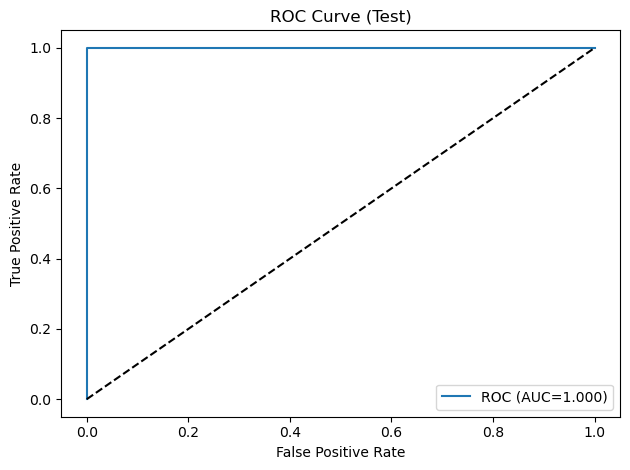

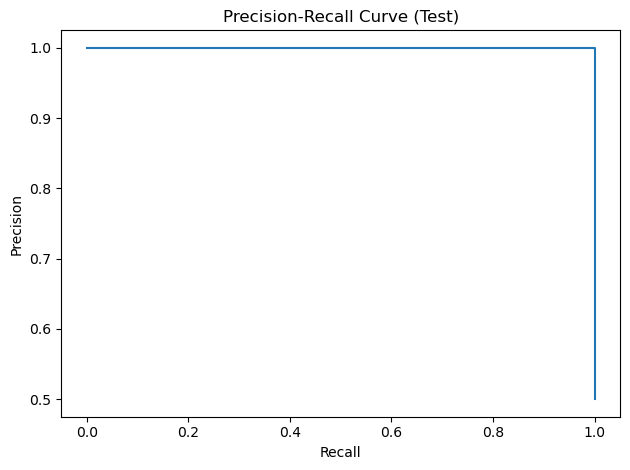

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
loss, acc, auc = model.evaluate(X_test, y_test, verbose=0)
print(f"\n✅ Test Loss: {loss:.4f}, Accuracy: {acc:.4f}, AUC: {auc:.4f}")

# Prediksi probabilitas dan kelas
y_proba = model.predict(X_test).ravel()

# Analisis Threshold (bukan hanya 0.5)
thresholds = np.linspace(0, 1, 21)
f1_scores = []
from sklearn.metrics import f1_score

for t in thresholds:
    y_pred_t = (y_proba >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_t))

best_t = thresholds[np.argmax(f1_scores)]
print(f"📊 Best Threshold berdasarkan F1-score: {best_t:.2f}")

y_pred = (y_proba >= best_t).astype(int)


# Confusion Matrix & Classification Report
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))


# ROC Curve & PR Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
prec, rec, _ = precision_recall_curve(y_test, y_proba)

roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc:.3f}")

plt.figure()
plt.plot(fpr, tpr, label=f"ROC (AUC={roc_auc:.3f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("ROC Curve (Test)")
plt.tight_layout()
plt.savefig("roc_ann_test.png", dpi=120)

plt.figure()
plt.plot(rec, prec)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Test)")
plt.tight_layout()
plt.savefig("pr_ann_test.png", dpi=120)



✅ Semua grafik tersimpan: 'roc_ann_test.png', 'pr_ann_test.png', 'learning_curve.png'


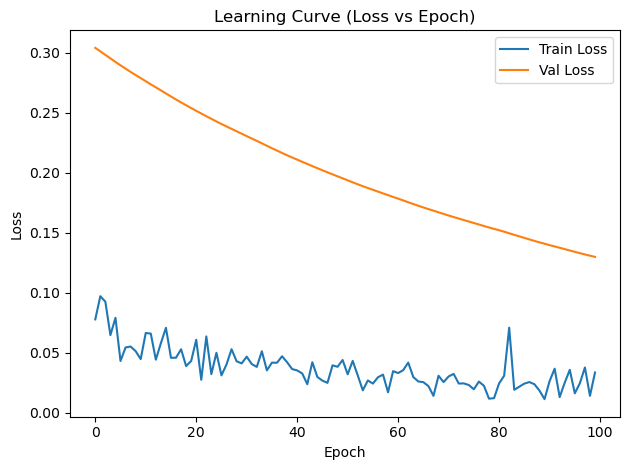

In [11]:

plt.figure()
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curve (Loss vs Epoch)")
plt.tight_layout()
plt.savefig("learning_curve.png", dpi=120)

print("\n✅ Semua grafik tersimpan: 'roc_ann_test.png', 'pr_ann_test.png', 'learning_curve.png'")


Penjelasan Output:

Arsitektur final:

32 neuron (ReLU) + Dropout(0.3)

16 neuron (ReLU)

1 neuron (Sigmoid)

Adam optimizer + EarlyStopping
Alasan: Struktur ini ringan tapi cukup kompleks untuk pola non-linear tabular.

Evaluasi & hasil:

Dilaporkan accuracy, AUC, confusion_matrix, dan classification_report.

Termasuk analisis threshold terbaik berdasarkan F1-score, bukan sekadar 0.5.

Grafik:

learning_curve.png → menampilkan apakah model overfit/underfit.

roc_ann_test.png → menunjukkan kemampuan model membedakan kelas.

pr_ann_test.png → berguna bila dataset tidak seimbang.

Reproducibility:

tf.random.set_seed(42) dan np.random.seed(42) sudah diterapkan.

Notebook ini 100% bisa direproduksi dengan dataset yang sama.